# <span style="color:#F72585"><center>El efecto del tamaño de muestra</center></span>


En esta lección veremos cómo la distribución posterior se transforma en la medida en que el número de observaciones (tamaño de la muestra observada) crece.

En nuestro primer ejemplo usaremos el mismo problema de la clase anterior  pero introducimos  un nuevo modelo de observaciones: inverso binomial o binomial negativo (NBinomial). Adicionalmente se propone un nuevo experimento, en el cual parece más adecuado utilizar un modelo Poisson para la muestra observada.

## <span style="color:#4361EE">Modelo Binomial Negativo</span>


En el mismo problema de las lecciones 1 y 2, vamos a modificar el experimento. Ahora, vamos a realizar de nuevo experimentos de Bernoulli independientes, hasta obtener $w$ resultados negativos (agua). Lo que contabilizamos ahora es el número de éxitos $n$, obtenidos hasta conseguir exactamente $w$ fallos (agua). 

$\leadsto$ Note que hemos invertido la codificación de éxito. Ahora consideramos fracaso, si se obtiene agua. Es solamente nomenclatura, para usar la notación más estandarizada.

En esta caso la probabilidad de obtener exactamente $n$ éxitos (tierra) hasta obtener $w$ fallas (agua) es dada por

$${\displaystyle P(n| \mu, w)\equiv {\binom {n+w-1}{w}}(1-\mu)^{w}\mu^{n}} = \text{NBinomial}(n;w,\mu)$$

## <span style="color:#4361EE">Simulación del experimento</span>


Vamos a realizar una simulación del experimento. Supondremos que el parámetro investigado, proviene de la distribución $\text{Beta}(7.5,5.2)$, en concordancia con el resultado del experimento anterior.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.optimize import minimize_scalar as minimize

#Primero fijamos una semilla para que le experimento sea reproducible
L = 5000
np.random.seed(L)

# Hiperparámetros para generar mu
alpha_0 = 7.5
beta_0  = 5.2

mu = stats.beta(alpha_0,beta_0).rvs(1)
print(mu) #[0.68252605]

[0.68252605]


In [3]:
# Definir el número de fracasos para las muestras
w = np.array([6, 10, 20, 50, 100, 500])
# Obtener los datos de las muestras
n = np.array(stats.nbinom.rvs(w,mu,1))
print(n)

[  3   6   5  25  68 232]


## <span style="color:#4361EE">Selección de la a priori</span>


En este caso  vamos a seleccionar la distribución a priori   $p(\mu)=\text{Beta}(\mu;1.2,1.2)$, que es muy poco informativa y también conjuga con el modelo NBinomial, es decir, la a posterior resultante es 

$$p(\mu|w)= \text{Beta}(\mu; \alpha + w, \beta + n)$$


La siguiente figura muestra las distribuciones posteriores de cada experimento

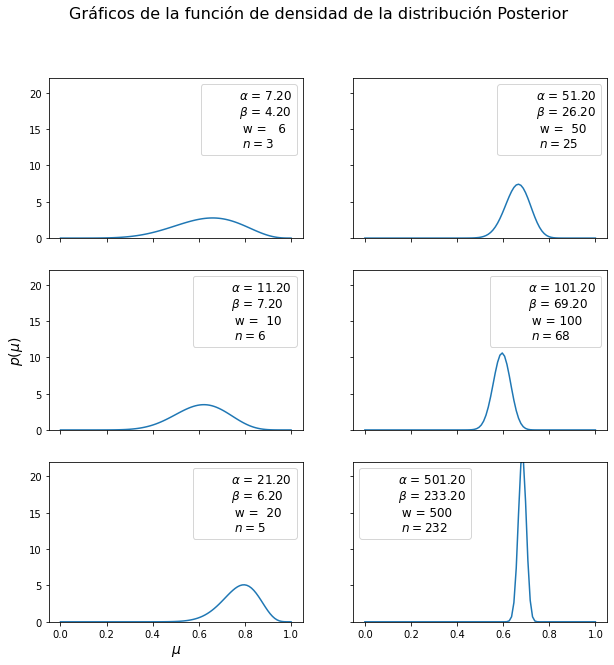

In [4]:
alpha = 1.2
beta = 1.2
alpha_params = alpha + w
beta_params  = beta + n

idx = np.arange(6)

row = np.array([0,0,0,1,1,1])
col = np.array([0,1,2,0,1,2])
x = np.linspace(0,1,100)

fig, ax = plt.subplots(3, 2,sharex = True, sharey = True, figsize=(10,10))
for i in idx:
    alpha = alpha_params[i]
    beta  = beta_params[i]
    y = stats.beta(alpha,beta).pdf(x)
    ax[col[i],row[i]].set_ylim(0,22)
    ax[col[i],row[i]].plot(x,y)
    ax[col[i],row[i]].plot(0, 0, label="$\\alpha$ = {:3.2f}\n$\\beta$ = {:3.2f}\n w = {:3n}\n $n = {:3n}$".format(alpha, beta,w[i],n[i]), alpha=0)
    ax[col[i],row[i]].legend(fontsize=12)
ax[2,0].set_xlabel('$\\mu$', fontsize=14)
ax[1,0].set_ylabel('$p(\\mu)$', fontsize=14)
fig.suptitle('Gráficos de la función de densidad de la distribución Posterior',fontsize=16)
plt.show()
    

## <span style="color:#4361EE">Estimaciones Bayesianas puntuales </span>



In [5]:
# Mediana Posterior
MEAP = stats.beta.median(alpha_params, beta_params, loc=0, scale=1)
MEAP

array([0.63951971, 0.61271501, 0.7804501 , 0.66289638, 0.59426491,
       0.68262759])

In [6]:
# Media Posterior
EAP = stats.beta.mean(alpha_params, beta_params)
EAP

array([0.63157895, 0.60869565, 0.77372263, 0.66149871, 0.59389671,
       0.68246187])

In [7]:
# 95% intervalos de credibilidad
i = 2
i_cred_95 = stats.beta(alpha_params[i],beta_params[i]).ppf((0.025,0.975))
i_cred_95

array([0.60303314, 0.9067233 ])

In [8]:
i = 5
i_cred_95 = stats.beta(alpha_params[i],beta_params[i]).ppf((0.025,0.975))
i_cred_95

array([0.64835813, 0.71562432])

```{table} Resumen de las estimaciones Bayesianas
:name: tabla 3.1

| |Tabla 3.1 |Estimaciones | Bayesianas   | Puntuales| | | 
|------|------|------|------|-------|-----|------|
|w|6 |10 |20 |50 |100| 500|
|MEAP|0.63951971| 0.61271501| 0.7804501| 0.66289638| 0.59426491| 0.68262759|
|EAP|0.63157895| 0.60869565| 0.77372263| 0.66149871| 0.59389671| 0.68246187|
```

```{table} Resumen de las estimaciones Bayesianas
:name: tabla 3.2

| |Tabla 3.2 |Estimaciones | Bayesianas   | 95% intervalo| de |credibildad| 
|------|------|------|------|-------|-----|------|
|w|6 |10 |20 |50 |100| 500|
|Inf|0.34765924 |0.38329073 |0.60303314 |0.55314697 |0.519428228| 0.64835813|
|Sup|0.87195896 |0.8117276| 0.811727683 |0.81172768 |0.66627702 |0.71562432|
```

## <span style="color:#4361EE">Tarea</span>


Escriba el código para calcular la moda posterior en cada caso. Revise la lección [Computación Bayesiana Básica](Computacion_Basica), en el caso Binomial-Beta.